# Gibbs Sampling: Draw Samples from Multivariate Distributions

## Why?

- It is one of the Markov Chain Monte Carlo (MCMC) methods which are often more efficient in drawing random samples particularly from multivariate distributions (i.e., multi-dimensional problems).

  - The inverse transform sampling requires the quantile function (inverse CDF) to be available.
  - The rejection-sampling method may have difficulty finding the proposal distribution.
  - Both of the methods may require the joint distribution in closed form for multivariate cases.
  - Both of the methods may be cumbersome for multivariate cases (curse of dimensionality).


## Preliminary: joint distributions, marginal distributions, and conditional distributions

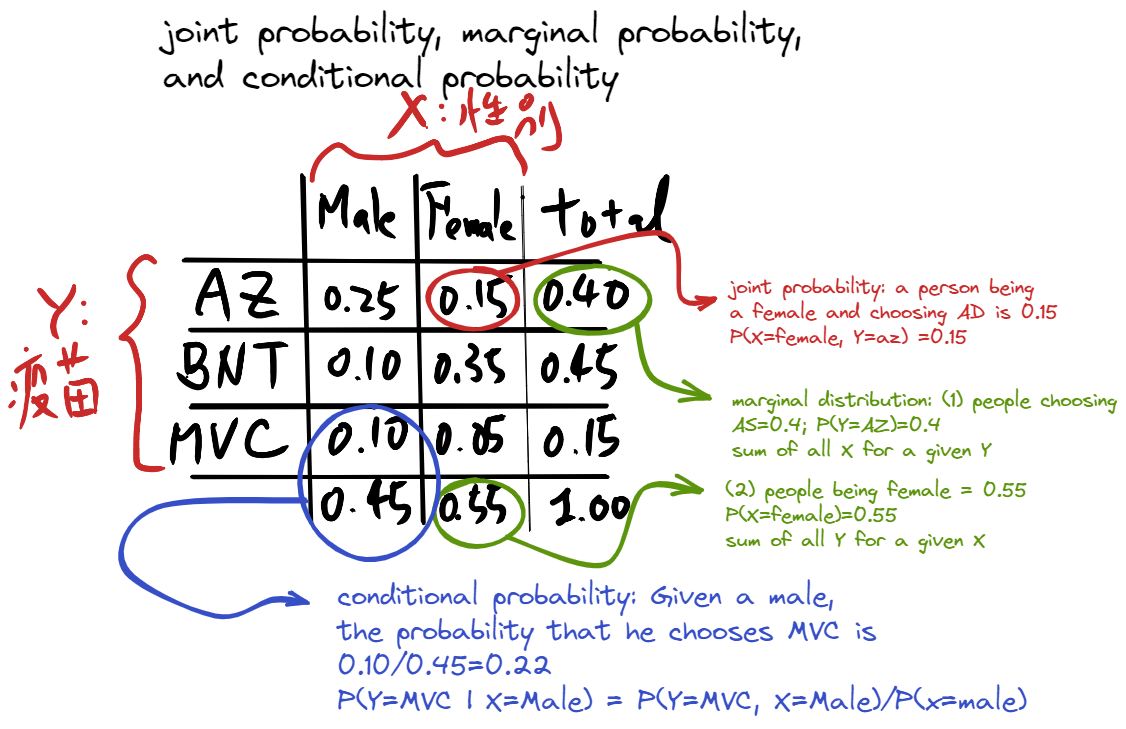


## Introduction of Gibbs Sampler

To generate draws from a multivariate joint probability distribution, the Gibbs sampling draws samples sequentially from a series of _**conditional probability distributions**_ on lower-dimensional subsets of the random variables. It is often used when the joint distribution is not known explicitly or difficult to draw samples from directly (ex: multivariate distribution). The key of this method is to use a full set of _**conditional distributions**_, which is usually easier to draw samples from.

There are two necessary conditions for Gibbs sampling :
1. The full set of conditional distributions should be available in closed form.
2. The forms should be tractable in the sense that they are easy to draw samples from.

## How does it work

How does the Gibbs sampling work? Suppose the joint distribution we want to draw samples from is $f(X,Y)$. Then:
1. We derive the full set of conditional distributions: $f_X(x|y)$ and $f_Y(y|x)$.
2. We draw samples from these two conditional distributions alternately. 
- Step 1. Set initial values of $x$ and $y$: ------> $(x_0,y_0)$.
- Step 2. Sample $x_1$ from $f(X|Y=y_0)$ and then sample $y_1$ from $f(Y|X=x_1)$  ------> $(x_1,y_1)$.
- Step 3. Sample $x_2$ from $f(X|Y=y_1)$ and then sample $y_2$ from $f(Y|X=x_2)$  ------> $(x_2,y_2)$.
- Step 4. Repeat Step 2 and Step 3 for $n$ times.
- Step 5. Check the convergence of the sampler.

We thus obtain a sequence of samples $\{(x_0, y_0), (x_1, y_1), (x_2, y_2), ...(x_n, y_n)\}$, and the distribution should converge to the targeted joint distribution.

Note that it is likely that the starting values of $(x_0, y_0)$ are not optimal, leading to over-sampling regions that are actually of very low probability under the equilibrium distribution. Thus in practice we often discard the first tens or hundreds of points in the collection. The technique is called **burn-in**.


> **Note**: 
> Every step which produces a new sample contains two steps: 1. move along the x-axiom 2. move along the y-axiom 
> \begin{equation*} \boldsymbol{(x_0,y_0)} \rightarrow (x_1,y_0) \rightarrow \boldsymbol{(x_1,y_1)} \rightarrow (x_2,y_1) \rightarrow \boldsymbol{(x_2,y_2)} \end{equation*}
> ![title](gibb_sample_1.png)




### The sequence is a Markov chain

The procedure thus defines a sequence of pairs of random variables

\begin{equation} (x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3)... \end{equation}

This sequence is a **Markov chain** because it satisfies the **Markov property**.

>> **Markov property:** A stochastic process is said to have the Markov property if its conditional probability distribution of future ("t+1") states depends only on the present ("t") state but not the past ("t-1", "t-2", etc.) states. 
>>
>> - Past information is irrelevant.
>> - The current state summarizes all the information of the past.
>>
>> **Markov chain** is a discrete-time stochastic process satisfying the Markov property.

For the current example, it means that the conditional distribution of $(x_n,y_n)$ given the previous pairs $(x_0,y_0), (x_1,y_1), ..., (x_{n-1},y_{n-1})$ depends only on $(x_{n-1},y_{n-1})$. It also indicates that each draw depends on the previous draws and so the samples are not iid (independently and identically distributed). 

\begin{aligned} 
p((x_n,y_n)|(x_0,y_0),(x_1,y_1),...,(x_{n-1},y_{n-1})) = p((x_n,y_n)|(x_{n-1},y_{n-1}))
\end{aligned}

Thus, Gibbs sampling is a type of the **Markov Chain Monte Carlo (MCMC)** algorithms. 


[//]: # "## Issues of the Gibbs Sampling

There are two ways that Gibbs sampling may fail:

1. The first is when there are islands of high-probability states, with no paths between them. For example, consider a probability distribution over 2-bit vectors, where the vectors (0,0) and (1,1) each have probability ½, but the other two vectors (0,1) and (1,0) have probability zero. Gibbs sampling will become trapped in one of the two high-probability vectors, and will never reach the other one. More generally, for any distribution over high-dimensional, real-valued vectors, if two particular elements of the vector are perfectly correlated (or perfectly anti-correlated), those two elements will become stuck, and Gibbs sampling will never be able to change them.

2. The second problem can happen even when all states have nonzero probability and there is only a single island of high-probability states. For example, consider a probability distribution over 100-bit vectors, where the all-zeros vector occurs with probability $\frac{1}{2}$, and all other vectors are equally probable, and so have a probability of $\frac{1}{2(2^{100}-1)}$ each. If you want to estimate the probability of the zero vector, it would be sufficient to take 100 or 1000 samples from the true distribution. That would very likely give an answer very close to $\frac{1}{2}$. But you would probably have to take more than $2^{100}$samples from Gibbs sampling to get the same result. No computer could do this in a lifetime."




## Examples of a bivariate normal distribution

### joint distributions

\begin{align}
f_{XY}(x,y) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left( -\frac{1}{2(1-\rho^2)} 
 \left[ \left(\frac{x-\mu_x}{\sigma_x}\right)^2 + \left(\frac{y-\mu_y}{\sigma_y}\right)^2 - 2\rho \frac{(x-\mu_x)(y-\mu_y)}{\sigma_x \sigma_y} \right] \right).
\end{align}

where $\mu_x, \mu_y \in R$, $\sigma_x, \sigma_y > 0$, and $\rho \in (-1,1)$ are all constant.


### marginal distributions

\begin{align}
f_X(x) = \int f_{XY}(x,y) dy, \quad f_Y(y) = \int f_{XY}(x,y) dx;
\end{align}


\begin{align}
f_X(x) & = \frac{1}{\sqrt{2 \pi} \sigma_x }e^{-\frac{1}{2}\left(\frac{x-\mu_x}{\sigma_x} \right)},\\
f_Y(y) & = \frac{1}{\sqrt{2 \pi} \sigma_y }e^{-\frac{1}{2}\left(\frac{y-\mu_y}{\sigma_y} \right)}.
\end{align}


### conditional distributions

\begin{align}
f_X(x|Y=y) = \frac{f_{XY}(x,y)}{f_Y(y)}.
\end{align}

\begin{align}
(X|Y=y) & \sim N\left( \mu_x + \rho \frac{\sigma_x}{\sigma_y}(y-\mu_y),\quad \sigma_x^2(1-\rho^2) \right),\\
(Y|X=x) & \sim N\left( \mu_y + \rho \frac{\sigma_y}{\sigma_x}(x-\mu_x),\quad \sigma_y^2(1-\rho^2) \right).
\end{align}

As you can see from the equations, if $X$ and $Y$ are uncorrelated ($\rho=0$), the conditional distributions are the same as the marginal distributions. In that case, we could just draw $x$ and $y$ independently from their own marginal distributions and there is no need of using Gibbs sampling.


### A Graphical Demonstration

Let's draw a graph to show the data from a multivariate normal distribution. Note that for this plot the data is NOT generated using the Gibbs sampler. Instead, the data is drawn using special properties of normal distributions, and the property may not be applicable to other distributions.


In [5]:
using Interact, WebIO
using Distributions, Plots, LinearAlgebra, Statistics

μ = [1,1]
σ = [2 0; 0 3]
min_N = 50
max_N = 2000

draw0 = [rand(Normal(0, 1), max_N)'; rand(Normal(0, 1), max_N)']

2×2000 Matrix{Float64}:
 -0.16729  -0.91757  -0.973359  -1.47696   …  1.05932   -0.800379  -0.344437
  1.53513  -1.047     1.12067    0.686573     0.911235   0.103783  -0.698492

In [7]:
@manipulate for num=min_N:max_N, corr=-1:0.1:1
    
    correlation = [1 corr; corr 1]
    covariance =  σ*correlation*σ
    C = cholesky(covariance)
    
    draw = C.L * draw0[:, 1:num] .+ μ  # take care of the mean, std, and correlation

    x = draw[1,:]
    y = draw[2,:]    
  
    layout = @layout [a{0.6w,0.4h} _
                      b{0.6w,0.6h} c{0.4w, 0.6h}]

    default(fillcolor=:lightgrey, markercolor=:white, grid=false, legend=false)
    plot(layout=layout, link=:both, size=(400, 400),  margin=-10Plots.pt)
    scatter!(x,y, subplot=2, framestyle =:box)
    histogram!([x y], subplot=[1 3], orientation=[:v :h], framestyle=:none, bins=min(num, 100), normalize=true)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["num"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 2000, :min => 50, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(1025), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/chriscyhxx/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/chriscyhxx/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/chriscyhxx/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/chriscyhxx/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/chriscyhxx/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000162ed13c0, Task (runnable) @0x0000000162ed13c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\",\"91\",\"92\",\"93\",\"94\",\"

PosDefException: PosDefException: matrix is not positive definite; Cholesky factorization failed.

#### A simple case: $\mu_x = \mu_y =0$, $\sigma_x = \sigma_y = 1$, and $\rho=\rho$.

##### Write down the conditional distributions of X and Y. Note that both of them are normal distributions.

\begin{align}
(X|Y=y) & \sim N\left( \rho\cdot y,\quad (1-\rho^2) \right),\\
(Y|X=x) & \sim N\left( \rho\cdot x,\quad (1-\rho^2) \right).
\end{align}



##### Write a Gibbs sampler that allows users to choose: the number of sampling points $N$, the value of $\rho$, and initial values of $(x_0, y_0)$, and the number of burn-in points. You should follow the steps in Section 1.3 to draw $(x_n, y_n), n=1,\ldots,N$.


```julia
using Random, Statistics, Distributions

function Gibbs_BN(; N=100, rho=0.1, init=[2,2], skip=0) # total length: 1+skip+N; "1" for initial value
    x = ones(1+skip+N)*init[1]
    y = ones(1+skip+N)*init[2]
    for n = 2:skip+N+1
        x[n] = rand(Normal(rho*y[n-1], sqrt(1-rho^2)))  # mean=rho*y_{n-1}, variance=1-rho^2
        y[n] = rand(Normal(rho*x[n],   sqrt(1-rho^2))) 
    end
    return x[1+skip+1:end], y[1+skip+1:end]
end

x, y = Gibbs_BN(N=100000, rho=0.5, init=[2,2], skip=100)

# see if the statistics are close

[mean(x) std(x)] |> display
[mean(y) std(y)] |> display
cor(x,y) 

```


##### Draw a graph  similar to the one above.

## Use the Gibbs Sampling as an Example to Understand the MCMC methods

- MCMC: Markov Chain Monte Carlo

- MCMC is a big umbrella; Gibbs sampling, Metropolis-Hasting algorithms, etc., are under the umbrella.

- Markov Chain: a sequence of possible events in which the probability of each event depends only on the state attained in the previous event:
  - the events are not independent;
  - the event at $t$ depends only on event at $t-1$ but not at $t-j$ for $j \geq 2$;
  - event at $t-1$ summarizes all the relevant information up to time $t-1$.
- Monte Carlo method: use repeated random sampling as a key step in the analysis to obtain numerical results

- Different MCMC sampling methods differ in how they design the transition rule in the Markov chain, such that the steady state of the Markov chain (i.e., the _**stationary distribution**_) is the distribution we want to sample from (i.e., the target distribution).
  - stationary distribution: once the sequence arrives at the distribution, it will stay there. So from that point forward, all the samples come from the stationary/target distribution.

- Important property to ensure the stationary: detailed balance condition: $p(x)T(y|x) = p(y)T(x|y)$ where $T(y|x)$ is the transition probability of going from x to y; $T()$ is the transition matrix.

  - Why? sum up the LHS: $\sum_x p(x) T(y|x) = p(y) \sum_x T(x|y) = p(y)$, so that $pT=p$.
  
- Consider the case:
$$
\begin{bmatrix}
A_{t+1} \\
B_{t+1}
\end{bmatrix} =
\begin{bmatrix}
 0.3 & 0.5  \\
 0.7 & 0.5
\end{bmatrix}
\begin{bmatrix}
 A_t \\
 B_t
\end{bmatrix}.
$$  
We can show that it will converge to a stationary distribution.  

\begin{aligned}
\begin{bmatrix}
A_{t+2} \\
B_{t+2}
\end{bmatrix} & =
\begin{bmatrix}
 0.3 & 0.5  \\
 0.7 & 0.5
\end{bmatrix}
\begin{bmatrix}
A_{t+1}  \\
B_{t+1}
\end{bmatrix} \\ & =
\begin{bmatrix}
 0.3 & 0.5  \\
 0.7 & 0.5
\end{bmatrix}
\begin{bmatrix}
 0.3 & 0.5  \\
 0.7 & 0.5
\end{bmatrix}\begin{bmatrix}
 A_t \\
 B_t
\end{bmatrix} = 
\begin{bmatrix}
 0.3 & 0.5  \\
 0.7 & 0.5
\end{bmatrix}^2
\begin{bmatrix}
 A_t \\
 B_t
\end{bmatrix}.
\end{aligned}
Thus,

\begin{aligned}
\begin{bmatrix}
A_{t+n} \\
B_{t+n}
\end{bmatrix}  =
\begin{bmatrix}
 0.3 & 0.5  \\
 0.7 & 0.5
\end{bmatrix}^n
\begin{bmatrix}
A_{t}  \\
B_{t}
\end{bmatrix}
\end{aligned}



In [31]:
p1 = [0.3 0.5; 0.7 0.5]

p1*p1 |> display

p1*p1*p1 |> display

p1*p1*p1*p1 |> display

p1*p1*p1*p1*p1 |> display


# do this using a loop 

function m_raise_power(m::Matrix, n::Integer)
    m1 = m
    for i in (2:n)
        m1 = m1*m
        println("When n=", i, " the matrix is " )
        display(m1)
    end    
end
    

m_raise_power(p1, 12)


2×2 Matrix{Float64}:
 0.44  0.4
 0.56  0.6

2×2 Matrix{Float64}:
 0.412  0.42
 0.588  0.58

2×2 Matrix{Float64}:
 0.4176  0.416
 0.5824  0.584

2×2 Matrix{Float64}:
 0.41648  0.4168
 0.58352  0.5832

When n=2 the matrix is 


2×2 Matrix{Float64}:
 0.44  0.4
 0.56  0.6

When n=3 the matrix is 


2×2 Matrix{Float64}:
 0.412  0.42
 0.588  0.58

When n=4 the matrix is 


2×2 Matrix{Float64}:
 0.4176  0.416
 0.5824  0.584

When n=5 the matrix is 


2×2 Matrix{Float64}:
 0.41648  0.4168
 0.58352  0.5832

When n=6 the matrix is 


2×2 Matrix{Float64}:
 0.416704  0.41664
 0.583296  0.58336

When n=7 the matrix is 


2×2 Matrix{Float64}:
 0.416659  0.416672
 0.583341  0.583328

When n=8 the matrix is 


2×2 Matrix{Float64}:
 0.416668  0.416666
 0.583332  0.583334

When n=9 the matrix is 


2×2 Matrix{Float64}:
 0.416666  0.416667
 0.583334  0.583333

When n=10 the matrix is 


2×2 Matrix{Float64}:
 0.416667  0.416667
 0.583333  0.583333

When n=11 the matrix is 


2×2 Matrix{Float64}:
 0.416667  0.416667
 0.583333  0.583333

When n=12 the matrix is 


2×2 Matrix{Float64}:
 0.416667  0.416667
 0.583333  0.583333

### the case of Metropolis-Hastings Sampling

- The method does not require the full conditional probability (unlike the Gibbs sampling). Instead, it uses a proposal distribution to help drawing samples from the target distribution. Put differently, if you do not have the full conditional probability, you could use the Metropolis-Hastings method.

  - Metropolis: the proposal distribution is normal (symmetric).

  - Metropolis-Hastings: the proposal distribution can be normal or other asymmetric distributions.


- Using information from the proposal distribution instead of the target distribution, we need an additional mechanism to make sure that the draws meet the condition of the target distribution, and the mechanism is the use of acceptance probability. So, draws from the proposal distributions are accepted only with a probability which is not always equal to 1.


- In a nutshell: After we draw a candidate (call it $z$) for $x_{t+1}$ given $x_t$, we accept it with a probability (which is not always 1). 

  - The rule may suggest to accept it with a probability equal to 0.6. So we draw a random number from $U(0,1)$ and if the number is less than 0.6 then we accept it and set $x_{t+1}=z$. Otherwise, we reject the candidate and set $x_{t+1}=x_t$. 

### the case of Gibbs Sampling 

- Use the full conditional probability to design the transition probability.
- There is no need of the reject-accept mechanism.


### Metropolis-Hastings sampling vs. Gibbs Sampling

- The full conditional probability distribution in the Gibbs sampling can be treated as a special case of the proposal distribution. It is an _efficient_ proposal distribution which always satisfies the detailed balance condition at each draw of the random numbers. So, draws based on the _**full conditional probability**_ are accepted with the probability equal to 1. Put differently, the Gibbs-sampling can be seen as a precise version of the Metropolis-Hastings algorithm; it chooses the most suitable proposed distribution at each step.

- MH: "proposal distribution" (so need accept-reject); GS: "full conditional probability"


[//]: # "- In contrast, Gibbs sampling would always accept $x_{t+1}$ with the probability equal to 1. It requires that we know conditional probability distributions."



### the case of Reject-accept sampling method (?!)

No, the accept-reject method is not a MCMC method because it does not satisfy the Markov property.

- The drawn sample is independent of each other.

  - Independent samples are both good and bad.
  
  - Good: We draw "independent" samples!

  - Bad: Because it is an independent sample, it does not use the information fully during the sampling process. In areas where the density is high, we should draw more samples from there, but the R-A method does not do this.

- If an empirical distribution f(x) has irregular shapes, or it is of high dimensions, then the envelop distribution (or the multiplier) could be difficult to find. Sometimes the multiplier would be very large, which often results in inefficient sampling.

misc

[//]: # "Markov Chains:
- state space: A, B
- Markov assumption: state t only depends on state t-1, not t-2 or earlier
- transition matrix: 
        A_t B_t 
 A_t-1  0.3 0.7
 B_t-1  0.5 0.5
- steady state: Does the prob of A and B ever converge?
   t  t+1  t+2
A  1  0.3   0.44
B  0  0.7   0.56

p1*0.3 + p2*0.5 = p1 (the prob of keeping in A)
p1+p2 = 1
=> p1 = 0.43, p2=0.58, that is, in the long run, we'll have 0.43 in A and 0.58 in B.

Accept-Reject sampling methods
- good: independent samples
- bad: independent samples, so we do not use the information fully duirng the sampling. That is, if in some area the density is high, we should draw more from there.
- bad: For some empirical distribution f(x), it has irregular shape, or it is high dimensions. Then sometimes the M is difficult to find, or that the M would be very large. A large M would result in very inefficient sampling.

The MCMC sampling would help.
- good: The drawing of the current sample (Monte Carlo) depends on the previous sample (so chain, Markov chain). It learns from the previous sample.
- How do we learn, what is the rule?
- stationary dist: once there, it will stay there.
- engineer a Makov chian whose stationary dist is the target dist
  - different from method to method
  - Metropolis Hasting is one of them (Gibbs sampling?)
- transition probability T(). If the detailed balance holds, then the p(x) is the stationary dist of the Markov chain.
  - detailed balance cond: p(x)T(y|x) = p(y)T(x|y).
  - Essentially, pT=p, so that they are all in p."
